In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import os

ModuleNotFoundError: No module named 'gensim'

In [10]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install gensim

  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [21 lines of output]
  + C:\Users\usame\AppData\Local\Programs\Python\Python313\python.exe C:\Users\usame\AppData\Local\Temp\pip-install-p6z0_ht2\numpy_7f670be8d56d4c73b4f45864d7ca9a76\vendored-meson\meson\meson.py setup C:\Users\usame\AppData\Local\Temp\pip-install-p6z0_ht2\numpy_7f670be8d56d4c73b4f45864d7ca9a76 C:\Users\usame\AppData\Local\Temp\pip-install-p6z0_ht2\numpy_7f670be8d56d4c73b4f45864d7ca9a76\.mesonpy-2z39t2bn -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\usame\AppData\Local\Temp\pip-install-p6z0_ht2\numpy_7f670be8d56d4c73b4f45864d7ca9a76\.mesonpy-2z39t2bn\meson-python-native-file.ini
  The Meson build system
  Version: 1.2.99
  Source dir: C:\Users\usame\AppData\Local\Temp\pip-install-p6z0_ht2\numpy_7f670be8d56d4c73b4f45864d7ca9a76
  Build dir: C:\Users\usame\AppData\Local\Temp\pip-install-p6z0_ht2\numpy_7f670be8d56d4

In [18]:
from gensim.models import Word2Vec


ModuleNotFoundError: No module named 'gensim'

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\usame\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\usame\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\usame\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
df = pd.read_csv('C:/Users/usame/Downloads/archive/books.csv', on_bad_lines='skip')
texts = df['title'] 
print(df.columns)



Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [21]:
print("Original text sample:\n", texts.iloc[0])


Original text sample:
 Harry Potter and the Half-Blood Prince (Harry Potter  #6)


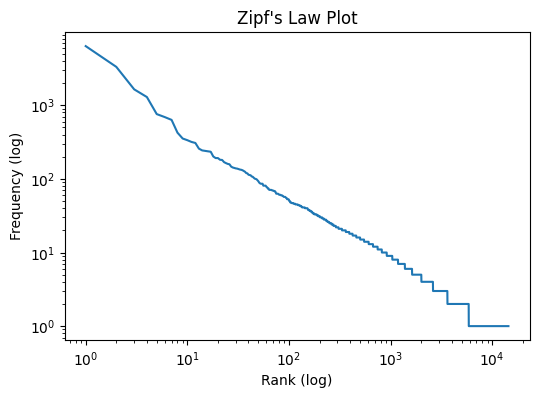

In [22]:
def zipf_plot(texts):
    words = ' '.join(texts).lower().split()
    freq = Counter(words)
    freq_sorted = sorted(freq.values(), reverse=True)
    ranks = range(1, len(freq_sorted) + 1)
    plt.figure(figsize=(6,4))
    plt.loglog(ranks, freq_sorted)
    plt.xlabel("Rank (log)")
    plt.ylabel("Frequency (log)")
    plt.title("Zipf's Law Plot")
    plt.show()

zipf_plot(texts)


In [ ]:

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

def lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['tokens'] = texts.apply(clean_text)
df['stemmed'] = df['tokens'].apply(stemming)
df['lemmatized'] = df['tokens'].apply(lemmatization)


In [ ]:
df_stem = pd.DataFrame({'text': df['stemmed'].apply(lambda x: ' '.join(x))})
df_lemma = pd.DataFrame({'text': df['lemmatized'].apply(lambda x: ' '.join(x))})

df_stem.to_csv('stemmed_data.csv', index=False)
df_lemma.to_csv('lemmatized_data.csv', index=False)


In [ ]:
print("Zipf plot for stemmed data:")
zipf_plot(df_stem['text'])

print("Zipf plot for lemmatized data:")
zipf_plot(df_lemma['text'])


In [ ]:
tfidf_stem = TfidfVectorizer()
tfidf_lemma = TfidfVectorizer()

X_stem = tfidf_stem.fit_transform(df_stem['text'])
X_lemma = tfidf_lemma.fit_transform(df_lemma['text'])

pd.DataFrame(X_stem.toarray(), columns=tfidf_stem.get_feature_names_out()).to_csv("tfidf_stemmed.csv", index=False)
pd.DataFrame(X_lemma.toarray(), columns=tfidf_lemma.get_feature_names_out()).to_csv("tfidf_lemmatized.csv", index=False)
